Importar librerías y cargar paths absolutos.

In [ ]:
import os, sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import numpy as np
import librosa
import pyloudnorm as pyln
import matplotlib.pyplot as plt
import librosa
from challenge.preprocessing import split_audio

parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
blues_path = os.path.join(parent_dir, 'dataset\\genres_original\\blues')
inference_path = os.path.join(parent_dir, 'songs\\wav')



Checkeo el nivel de algunos wavs del dataset

In [15]:

for file in os.listdir(blues_path)[:10]:
    file_path = os.path.join(blues_path, file)
    y, sr = librosa.load(file_path)

    meter = pyln.Meter(sr)
    loudness = meter.integrated_loudness(y)
    print(f'Loudness of the file {file}: {loudness} dB')


Loudness of the file blues.00000.wav: -17.52670922146246 dB
Loudness of the file blues.00001.wav: -20.43872645327597 dB
Loudness of the file blues.00002.wav: -14.903780159169354 dB
Loudness of the file blues.00003.wav: -17.555090139318697 dB
Loudness of the file blues.00004.wav: -19.132409971047515 dB
Loudness of the file blues.00005.wav: -17.538009932545254 dB
Loudness of the file blues.00006.wav: -14.66566864811852 dB
Loudness of the file blues.00007.wav: -16.17836928978003 dB
Loudness of the file blues.00008.wav: -17.734219835079404 dB
Loudness of the file blues.00009.wav: -18.095996136305267 dB


Ahora hago lo mismo pero con las inferencias

In [14]:
segment_length = 3
segments = split_audio(y, sr, segment_length)
expected_segment_length = sr * segment_length

for i, segment in enumerate(segments):
    segment = librosa.util.fix_length(segment, size=expected_segment_length)
    
    S = librosa.feature.melspectrogram(y=segment, sr=sr, n_fft=1024, 
                                        hop_length=512, n_mels=128)
    S_dB = librosa.power_to_db(S, ref=np.max)
    
    assert S_dB.shape == (128, 130), \
        f"Inconsistent spectrogram shape: {S_dB.shape}"  

In [ ]:
def plot_spec(fs, S_dB):
    fig, ax = plt.subplots(figsize=(5,3))
    img = librosa.display.specshow(S_dB, x_axis='time',
                            y_axis='mel', sr=fs,
                            fmax=16000, ax=ax)
    fig.colorbar(img, ax=ax, format='%+2.0f dB', ticks=[0, -20, -40, -60, -80])
    plt.yticks([512, 1024, 2048, 4096, 8192], ['0.5', '1', '2', '4', '8'])
    plt.ylabel('Frecuency [kHz]')
    plt.xlabel('Time [s]')
    plt.title(f'{file}')
    plt.tight_layout()
    plt.subplots_adjust(left=0.11, right=0.995, top=0.98, bottom=0.15)
    plt.show()

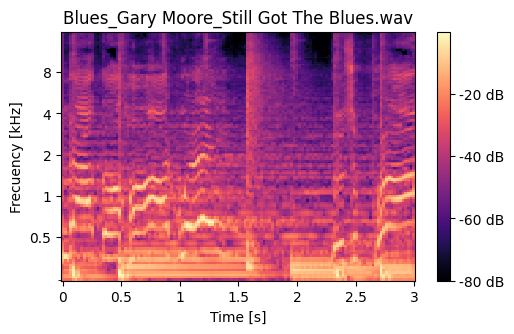

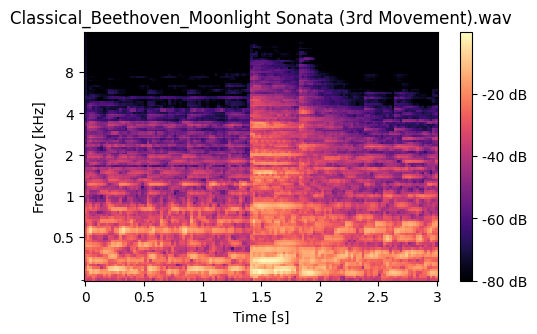

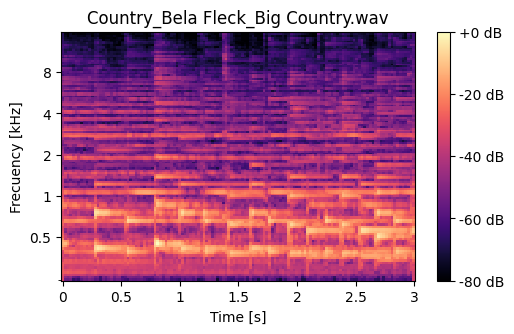

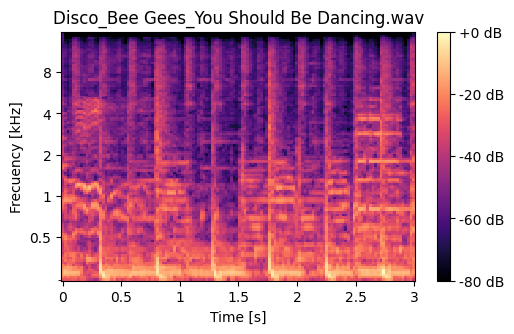

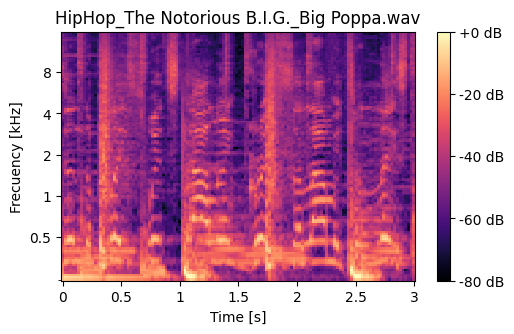

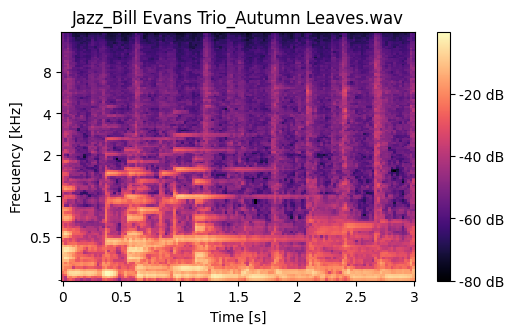

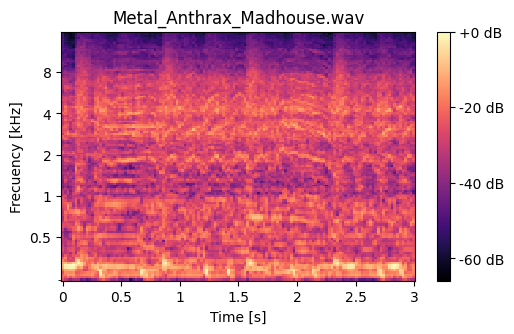

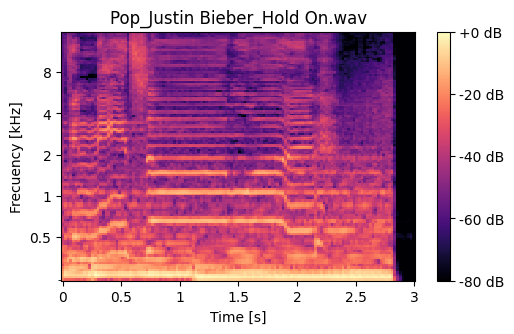

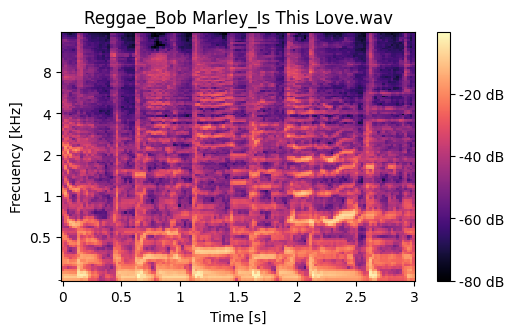

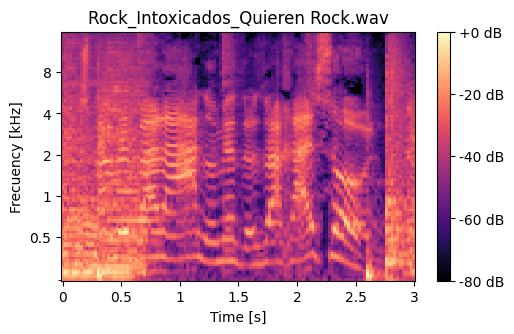

In [18]:
for i, file in enumerate(os.listdir(inference_path)):
    file_path = os.path.join(inference_path, file)
    y, sr = librosa.load(file_path)

    segment_length = 3
    segments = split_audio(y, sr, segment_length)
    expected_segment_length = sr * segment_length
    for i, segment in enumerate(segments[10:11]):
        segment = librosa.util.fix_length(segment, size=expected_segment_length)
        
        S = librosa.feature.melspectrogram(y=segment, sr=sr, n_fft=1024, 
                                            hop_length=512, n_mels=128)
        S_dB = librosa.power_to_db(S, ref=np.max)
        plot_spec(sr, S_dB=S_dB)
        
        assert S_dB.shape == (128, 130), \
            f"Inconsistent spectrogram shape: {S_dB.shape}" 
